In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import pandas as pd
df = pd.read_csv("apples_and_oranges.csv")

In [20]:
df

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


##### Explore the data

In [24]:
#Displays top 5 rows in the dataset
df.head ()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [23]:
#Displays dimensions of the dataset
df.shape

(40, 3)

We can see that there are 40 rows of data which means there are 40 fruits in this data and 3 columns which means there are 3 features or data points for each fruit.

In [25]:
#Displays column names in the dataset
df.columns

Index(['Weight', 'Size', 'Class'], dtype='object')

In [26]:
# Displays information about column attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


We can Continue exploring the data and get a count of all of the columns that contain empty (NaN, NAN, na) values.

In [27]:
#Count the empty values in each column
df.isna ().sum()

Weight    0
Size      0
Class     0
dtype: int64

None of the columns contain any empty values

class is the column that we are going to predict with the help of other columns. Let us explore the different possible values in that column



In [30]:
#Prints unique values in Diagnosis column
df['Class'].unique()

array(['orange', 'apple'], dtype=object)

In [31]:
#Count of unique values in Diagnosis column
df['Class'].value_counts()

apple     20
orange    20
Name: Class, dtype: int64

We can identify that out of 40 fruits, 20 are labeled as apple and 20 are labeled as orange

In [32]:
#Convert column names to a list
l=list (df.columns)
print (l)

['Weight', 'Size', 'Class']


In [33]:
#summary of all numeric columns
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


### Visualize the data

C:\Users\Saad\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

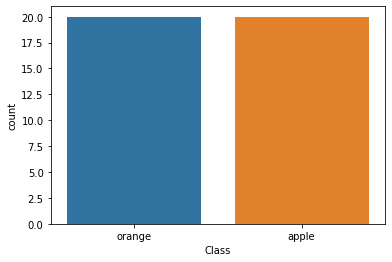

In [37]:
#Showing the total count of malignant and benign patients in a counterplot
sns.countplot (df['Class'])

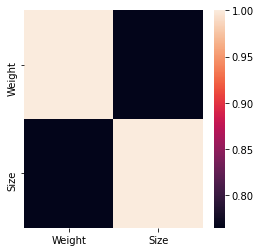

In [40]:
#Heatmap of Correlation
corr = df.corr()
plt.figure (figsize= (4,4))
sns.heatmap (corr);

### Encode the Categorical data

In [44]:
df['Class'] = df['Class'].map({'apple':1,'orange':0})
df['Class'].unique()

array([0, 1], dtype=int64)

### Splitting the dataset

In [46]:
x = df.drop('Class',axis=1)
y = df ['Class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.3)

In [47]:
x_train.shape

(28, 2)

In [48]:
x_test.shape

(12, 2)

### Feature Scaling

In [52]:
#Feature Scaling of data
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
x_train = ss.fit_transform (x_train)
x_test = ss.fit_transform (x_test)

### SVM

In [53]:
from sklearn import svm
svc = svm.SVC ()
#Loading the training data in the model
svc.fit (x_train,y_train)

SVC()

In [54]:
#Predicting output with test data
y_pred = svc.predict (x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

### Accuracy score

In [56]:
#Accuracy Score of Support vector classifier
from sklearn.metrics import accuracy_score
print(" Accuracy Score of Support vector classifier: ")
print (accuracy_score (y_test,y_pred ))

 Accuracy Score of Support vector classifier: 
1.0


##### Support vector Classifier with an accuracy score of about 100%